In [1]:
#Import all required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Retrieve the information stored in a CSV file and create a Dataframe from it
myfile ='/Users/ayomikunadebawojo/Documents/Machine Learning Assignment/ICM317_Report_DataSet_2000Rows.csv'

# read data into Dataframe 
df = pd.read_csv(myfile)

# Handle Missing Data and Outliers (Data Processing)

Only column FEAT_9 contains missing values according to the summary below. 184 rows have missing values in this column. We will be filling missing cells with mean value. Also, FEAT_5 shows an outlier of 1000 from the box plot which will be removed.

,FEAT_0,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1816.000000,2000.000000,2000.000000,2000.000000
mean,0.321475,1.0285,2.981000,-0.321475,31.293500,4.949500,0.335185,0.328700,4.997797,5.026500,0.510650,1.071500
std,0.296347,0.7127,1.235072,0.296347,159.895555,3.196257,0.298688,0.292039,3.216006,3.143523,0.290885,0.699737
min,0.000000,0.0000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,1.0000,2.000000,-0.540000,2.000000,2.000000,0.070000,0.070000,2.000000,2.000000,0.300000,1.000000
50%,0.230000,1.0000,3.000000,-0.230000,5.000000,5.000000,0.250000,0.240000,5.000000,5.000000,0.500000,1.000000
75%,0.540000,2.0000,4.000000,-0.050000,8.000000,8.000000,0.560000,0.540000,8.000000,8.000000,0.800000,1.000000
max,1.000000,2.0000,5.000000,0.000000,1000.000000,10.000000,1.000000,1.000000,10.000000,10.000000,1.000000,3.000000


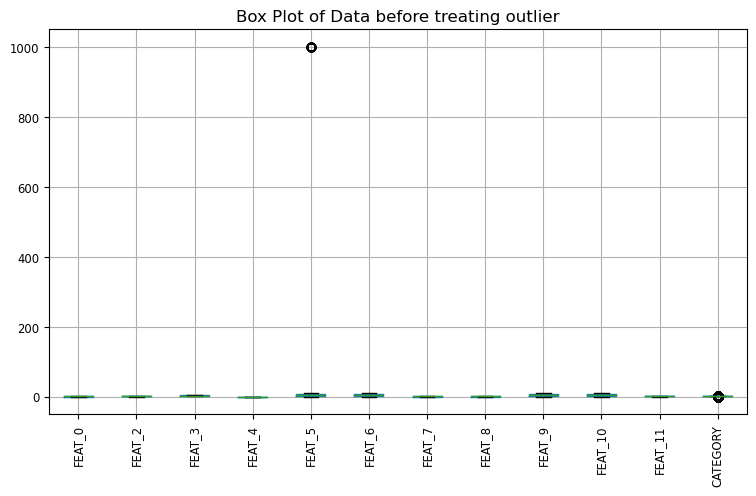

In [2]:
#Create a summary statistics of the information and generate a box plot to identify outliers and missing data
#Box Plot
boxplot = df.boxplot(fontsize = "small",rot = 90,figsize = (9,5))
boxplot.set_title("Box Plot of Data before treating outlier", fontsize = 12)

#Summary Statistics
df.describe()


In [3]:

# Remove outliers from FEAT_5 and replace NAs with mean value in FEAT_9 as shown below.

# Removing outlier
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace = True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace = True)
drop_outliers(df, 'FEAT_5')

# replace NAs with mean
df = df.fillna(df.FEAT_9.mean())

#Show revised boxplot after treating outlier
boxplot = df.boxplot(fontsize = "small",rot = 90,figsize = (9,5))
boxplot.set_title("Box Plot of Data after treating outlier", fontsize = 12)

#Show revised summary statistics after treating missing value
df.describe()

,FEAT_0,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
count,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000
mean,0.322049,1.033898,2.980483,-0.322049,4.923986,4.942476,0.333231,0.330483,5.005099,5.011299,0.512173,1.069337
std,0.296741,0.713892,1.235243,0.296741,3.122273,3.190714,0.298263,0.292747,3.067999,3.144495,0.290657,0.699302
min,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,1.000000,2.000000,-0.545000,2.000000,2.000000,0.070000,0.070000,2.000000,2.000000,0.300000,1.000000
50%,0.230000,1.000000,3.000000,-0.230000,5.000000,5.000000,0.250000,0.240000,5.005099,5.000000,0.500000,1.000000
75%,0.545000,2.000000,4.000000,-0.050000,8.000000,8.000000,0.560000,0.550000,7.000000,8.000000,0.800000,1.000000
max,1.000000,2.000000,5.000000,0.000000,10.000000,10.000000,1.000000,1.000000,10.000000,10.000000,1.000000,3.000000


# Splitting Data into Test and Train Set and Label Encoding FEAT_1

FEAT_1 is a categorical column. In order to train model. We need to convert it to numerical. We will be using label encoding for this.

In [4]:
#Spliting Data into Train and Test Set

# Split the data frame into two to get a training set (80%) and a test set (20%)
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

# Encode features on the Training Set with fit_transform
lencFEAT_1 = LabelEncoder()
train_set['FEAT_1'] = lencFEAT_1.fit_transform(train_set['FEAT_1'])

# Apply transform only on the test set
test_set['FEAT_1'] = lencFEAT_1.transform(test_set['FEAT_1'])

# Logistic Regression

In [5]:
# Definition of Features to enable us seperate x and y
Features = ['FEAT_0','FEAT_1','FEAT_2','FEAT_3','FEAT_4','FEAT_5','FEAT_6','FEAT_7','FEAT_8','FEAT_9','FEAT_10','FEAT_11']

# Defining x_train set
x_train = train_set[Features]

# Use Scalers on the x part of the Training Set
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)

#Label Encoding y_train
lenc_y = LabelEncoder()
y_train = lenc_y.fit_transform(train_set['CATEGORY'])

# Defining x_test set
x_test = test_set[Features]

# Use Scalers on the x part of the Training Set
scaler_x = StandardScaler()
x_test_scaled = scaler_x.fit_transform(x_test)

#Label Encoding y_test
lenc_y = LabelEncoder()
y_test = lenc_y.fit_transform(test_set['CATEGORY'])

# Logistic regression
logreg = LogisticRegression(solver = 'lbfgs', multi_class ='auto')
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

Logistic Regression [Training] Accuracy: 0.7886962106615286
Logistic Regression [Training] Error Score 0.21130378933847138
Logistic Regression [Test] Accuracy: 0.7717948717948718
Logistic Regression [Test] Error Score 0.22820512820512817


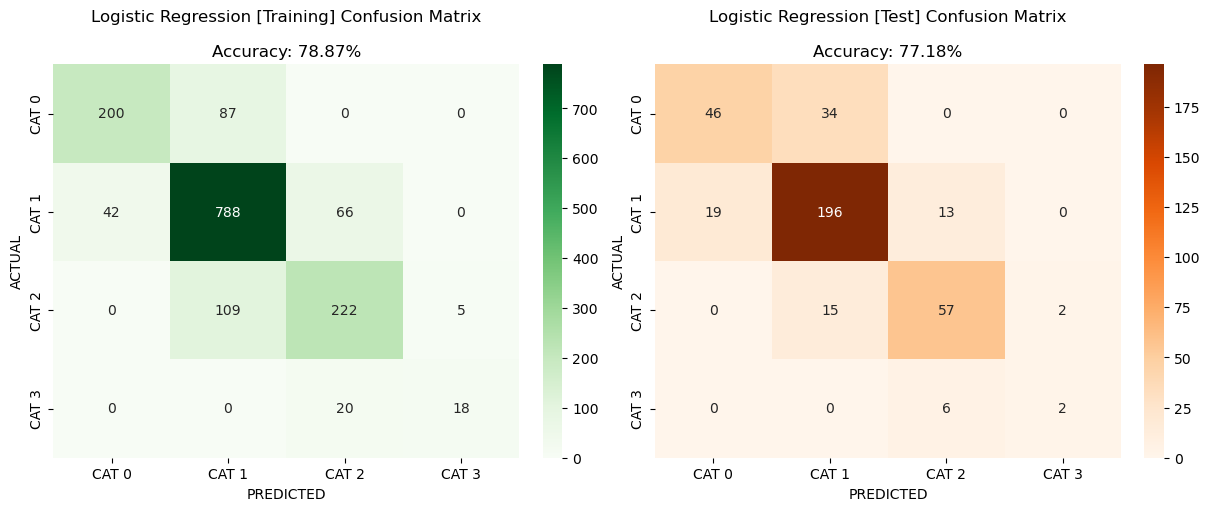

In [6]:
# show the Confusion Matrix over the Training and Test Set
%matplotlib inline

fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols = 2,constrained_layout = True, figsize = (12,5))
labels = ['CAT 0','CAT 1','CAT 2','CAT 3']

# training
y_train_pred = logreg.predict(x_train_scaled)
cm_train = confusion_matrix(y_train, y_train_pred)  
df_cm = pd.DataFrame(cm_train, columns = labels, index = labels)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'
accuracy = accuracy_score(y_train, y_train_pred)
print('Logistic Regression [Training] Accuracy:', accuracy)
print('Logistic Regression [Training] Error Score ' + str(1.0 - metrics.accuracy_score(y_train,y_train_pred)))
ax1.set_title('Logistic Regression [Training] Confusion Matrix\n\nAccuracy: ' + str(round(accuracy*100,2))+'%')

# test
y_test_pred = logreg.predict(x_test_scaled)
cm_test = confusion_matrix(y_test, y_test_pred)  
df_cm2 = pd.DataFrame(cm_test, columns = labels, index = labels)
df_cm2.index.name = 'ACTUAL'
df_cm2.columns.name = 'PREDICTED'
accuracy = accuracy_score(y_test, y_test_pred)
print('Logistic Regression [Test] Accuracy:', accuracy)
print('Logistic Regression [Test] Error Score ' + str(1.0 - metrics.accuracy_score(y_test, y_test_pred)))
ax2.set_title('Logistic Regression [Test] Confusion Matrix\n\nAccuracy: ' + str(round(accuracy*100,2))+'%')

snFig = sn.heatmap(df_cm, ax = ax1, cmap = "Greens", annot = True,  fmt = 'g')
snFig = sn.heatmap(df_cm2, ax = ax2, cmap = "Oranges", annot = True,  fmt = 'g')

# LOGISTIC REGRESSION POLYNOMIAL FEATURES (ORDER = 2)

In [7]:
# PERFORMING LOGISTIC REGRESSION POLYNOMIAL FEATURES MAPPING ORDER 2
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

# train
x_train = train_set[Features]
y_train = train_set['CATEGORY']

# test
x_test = test_set[Features]
y_test = test_set['CATEGORY']


# train
x_train_scaled = scaler_x.fit_transform(x_train)
order = 2

# test
x_test_scaled = scaler_x.fit_transform(x_test)


polynomial_features = PolynomialFeatures(degree = order, include_bias = 0)
order = 2
x_train_scaled = polynomial_features.fit_transform(x_train_scaled)
x_test_scaled = polynomial_features.fit_transform(x_test_scaled)

logreg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
logreg.fit(x_train_scaled, y_train) 

LogisticRegression(max_iter=1000)

Logistic Regression Polynomial Features 2 [Training] Accuracy: 0.9216441875401413
Logistic Regression Polynomial Features 2 [Training] Error Score 0.07835581245985868
Logistic Regression Polynomial Features Mapping Order 2 [Test] Accuracy: 0.8589743589743589
Logistic Regression Polynomial Features Mapping Order 2 [Test] Error Score 0.14102564102564108


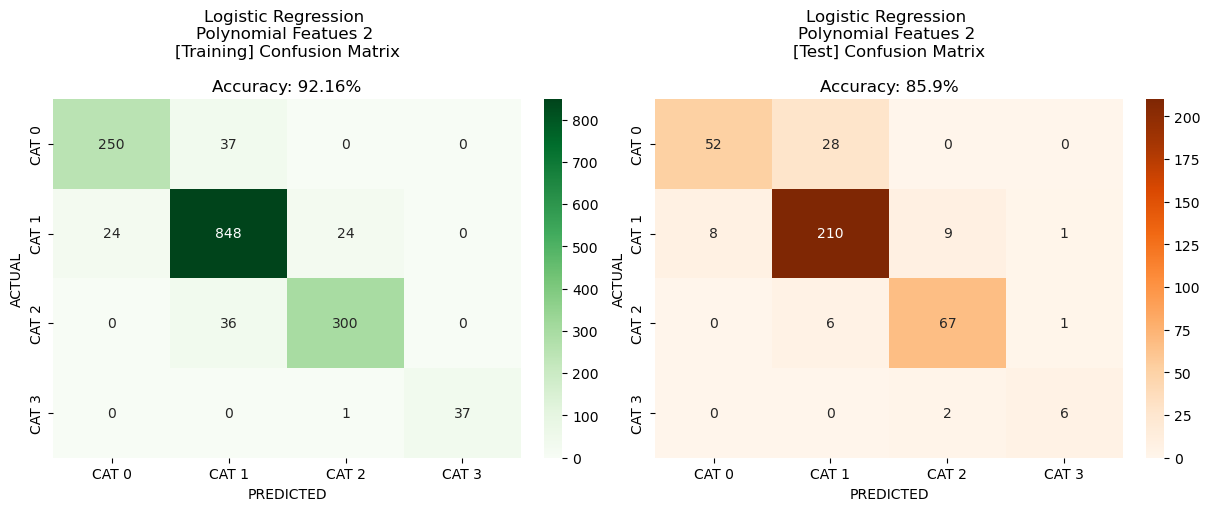

In [8]:
# PERFORMING CONFUSION MATRIX POLYNOMIAL FEATURES MAPPING ORDER 2
fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols = 2,constrained_layout = True, figsize = (12,5))
labels = ['CAT 0','CAT 1','CAT 2','CAT 3']

# train
y_train_pred = logreg.predict(x_train_scaled)
cm_train = confusion_matrix(y_train, y_train_pred)  
df_cm = pd.DataFrame(cm_train, columns = labels, index = labels)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'
accuracy = accuracy_score(y_train, y_train_pred)
ax1.set_title('Logistic Regression \nPolynomial Featues '+str(order)+' \n[Training] Confusion Matrix\n\nAccuracy: '+str(round(accuracy*100,2))+'%')
print('Logistic Regression Polynomial Features '+ str(order)+' [Training] Accuracy:', accuracy)
print('Logistic Regression Polynomial Features '+ str(order)+' [Training] Error Score '+str(1.0 - metrics.accuracy_score(y_train,y_train_pred)))



# test
y_test_pred = logreg.predict(x_test_scaled)
cm_test = confusion_matrix(y_test, y_test_pred)  
df_cm2 = pd.DataFrame(cm_test, columns = labels, index = labels)
df_cm2.index.name = 'ACTUAL'
df_cm2.columns.name = 'PREDICTED'
accuracy = accuracy_score(y_test, y_test_pred)
print('Logistic Regression Polynomial Features Mapping Order '+str(order)+' [Test] Accuracy:', accuracy)
print('Logistic Regression Polynomial Features Mapping Order '+str(order)+' [Test] Error Score '+str(1.0-metrics.accuracy_score(y_test,y_test_pred)))
ax2.set_title('Logistic Regression \nPolynomial Featues '+str(order)+' \n[Test] Confusion Matrix\n\nAccuracy: '+str(round(accuracy*100,2))+'%')


snFig = sn.heatmap(df_cm, ax = ax1, cmap = "Greens", annot = True,  fmt = 'g')
snFig = sn.heatmap(df_cm2, ax = ax2, cmap = "Oranges", annot = True,  fmt = 'g')


# LOGISTIC REGRESSION POLYNOMIAL FEATURES (ORDER = 3)

In [9]:
#  PERFORMING CONFUSION MATRIX POLYNOMIAL FEATURES MAPPING ORDER 3
warnings.filterwarnings("ignore", category = FutureWarning)

# train
x_train_scaled = scaler_x.fit_transform(x_train)
order = 3

# test
x_test_scaled = scaler_x.fit_transform(x_test)

polynomial_features = PolynomialFeatures(degree = order, include_bias = 0)
order = 3
x_train_scaled = polynomial_features.fit_transform(x_train_scaled)
x_test_scaled = polynomial_features.fit_transform(x_test_scaled)

logreg = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
logreg.fit(x_train_scaled, y_train) 

LogisticRegression(max_iter=1000)

Logistic Regression Polynomial Features Mapping Order 3 [Training] Accuracy: 1.0
Logistic Regression Polynomial Features Mapping Order 3 [Training] Error Score 0.0
Logistic Regression Polynomial Features Mapping Order 3 [Test] Accuracy: 0.8102564102564103
Logistic Regression Polynomial Features Mapping Order 3 [Test] Error Score 0.18974358974358974


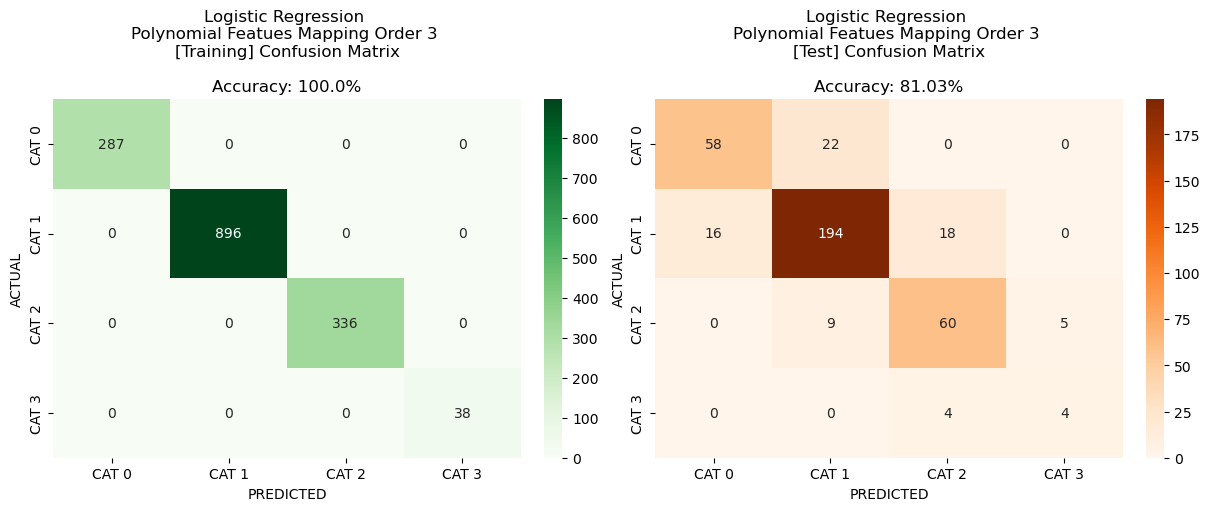

In [10]:
#  PERFORMING CONFUSION MATRIX POLYNOMIAL FEATURES MAPPING ORDER 3
fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols = 2,constrained_layout = True, figsize = (12,5))
labels = ['CAT 0','CAT 1','CAT 2','CAT 3']

# train
y_train_pred = logreg.predict(x_train_scaled)
cm_train = confusion_matrix(y_train, y_train_pred)  
df_cm = pd.DataFrame(cm_train, columns = labels, index = labels)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'
accuracy = accuracy_score(y_train, y_train_pred)
ax1.set_title('Logistic Regression \nPolynomial Featues Mapping Order '+str(order)+' \n[Training] Confusion Matrix\n\nAccuracy: '+str(round(accuracy*100,2))+'%')
print('Logistic Regression Polynomial Features Mapping Order '+str(order)+' [Training] Accuracy:', accuracy)
print('Logistic Regression Polynomial Features Mapping Order '+str(order)+' [Training] Error Score '+str(1.0-metrics.accuracy_score(y_train,y_train_pred)))

# test
y_test_pred = logreg.predict(x_test_scaled)
cm_test = confusion_matrix(y_test, y_test_pred)  
df_cm2 = pd.DataFrame(cm_test, columns = labels, index = labels)
df_cm2.index.name = 'ACTUAL'
df_cm2.columns.name = 'PREDICTED'
accuracy = accuracy_score(y_test, y_test_pred)
print('Logistic Regression Polynomial Features Mapping Order '+str(order)+' [Test] Accuracy:', accuracy)
print('Logistic Regression Polynomial Features Mapping Order '+str(order)+' [Test] Error Score '+str(1.0-metrics.accuracy_score(y_test,y_test_pred)))
ax2.set_title('Logistic Regression \nPolynomial Featues Mapping Order '+str(order)+' \n[Test] Confusion Matrix\n\nAccuracy: '+str(round(accuracy*100,2))+'%')

snFig = sn.heatmap(df_cm, ax = ax1, cmap ="Greens", annot = True,  fmt = 'g')
snFig = sn.heatmap(df_cm2, ax = ax2, cmap ="Oranges", annot = True,  fmt = 'g')

# KNearest Neighbours (KNN) Model

In [11]:
# K NEAREST NEIGBOUR
# Using K=5, calculate the Error Score over the Training Set and Test Set for the following
# C = 4 Classes ['CAT 0','CAT 1','CAT 2','CAT 3']
# M = 12 Features [FEAT_0, FEAT_1, FEAT_2,...,FEAT_11]
# Find the average error score over 200 Monte Carlo Train/Test splits of the available data
# Use KNearestNeighbours based on majority selection and not on weighted distance

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
# To supress a future warning in KNearest neighbours. The behaviour is good with the current format.

kvalue = 5
noTrials = 200
knn = KNeighborsClassifier(n_neighbors = kvalue)
np.random.seed(seed = 1)
# Seed the random number generator that will be used to split Training Set and Test Set
      
score_train = 0.0
score_test = 0.0
accuracy_train = 0.0
accuracy_test = 0.0
lenc_x = LabelEncoder()
stscaler = StandardScaler()

for trial in range(1,noTrials+1,1):

    # Split into two to get a training set (80%) and a test set (20%)
    train_set_knn, test_set_knn = train_test_split(df, test_size = 0.2)
    
    # train
    x_train_knn = train_set_knn.drop('CATEGORY', axis = 1)
    y_train_knn = train_set_knn['CATEGORY']
    
    # test
    x_test_knn = test_set_knn.drop('CATEGORY', axis = 1)
    y_test_knn = test_set_knn['CATEGORY']
    
    lenc_x = LabelEncoder()
    stscaler = StandardScaler()

    # train
    x_train_knn['FEAT_1'] = lenc_x.fit_transform(x_train_knn['FEAT_1'])
    x_train_scaled_knn = stscaler.fit_transform(x_train_knn)

    # test
    x_test_knn['FEAT_1'] = lenc_x.fit_transform(x_test_knn['FEAT_1'])
    x_test_scaled_knn = stscaler.fit_transform(x_test_knn)
    
    knn.fit(x_train_scaled_knn,y_train_knn.values.ravel())
    y_train_pred_knn = knn.predict(x_train_scaled_knn)
    accuracy_train = accuracy_train + accuracy_score(y_train_knn, y_train_pred_knn)
    score_train = score_train + (1.0 - metrics.accuracy_score(y_train_knn.values.ravel(),y_train_pred_knn))

    y_test_pred_knn = knn.predict(x_test_scaled_knn)
    accuracy_test = accuracy_test + accuracy_score(y_test_knn, y_test_pred_knn)
    score_test = score_test + (1.0 - metrics.accuracy_score(y_test_knn.values.ravel(),y_test_pred_knn))
    
print("KNearest Neighbours Average Accuracy Over Training Set = " + str(accuracy_train/noTrials))
print("KNearest Neighbours Average Accuracy Over Test Set = " + str(accuracy_test/noTrials))
print("KNearest Neighbours Average Error Score Over Training Set = " + str(score_train/noTrials))
print("KNearest Neighbours Average Error Score Over Test Set = " + str(score_test/noTrials))


KNearest Neighbours Average Accuracy Over Training Set = 0.831470777135517
KNearest Neighbours Average Accuracy Over Test Set = 0.7282051282051285
KNearest Neighbours Average Error Score Over Training Set = 0.1685292228644829
KNearest Neighbours Average Error Score Over Test Set = 0.27179487179487166


# Decision Tree
Fit a Decision Tree and Analyse the Confusion Matrix on the Training Set and the Confusion Matrix on the Test Set

Training Accuracy:  1.0
Training Error Score: 0.0
Test Accuracy:  0.7051282051282052
Test Error Score: 0.2948717948717948


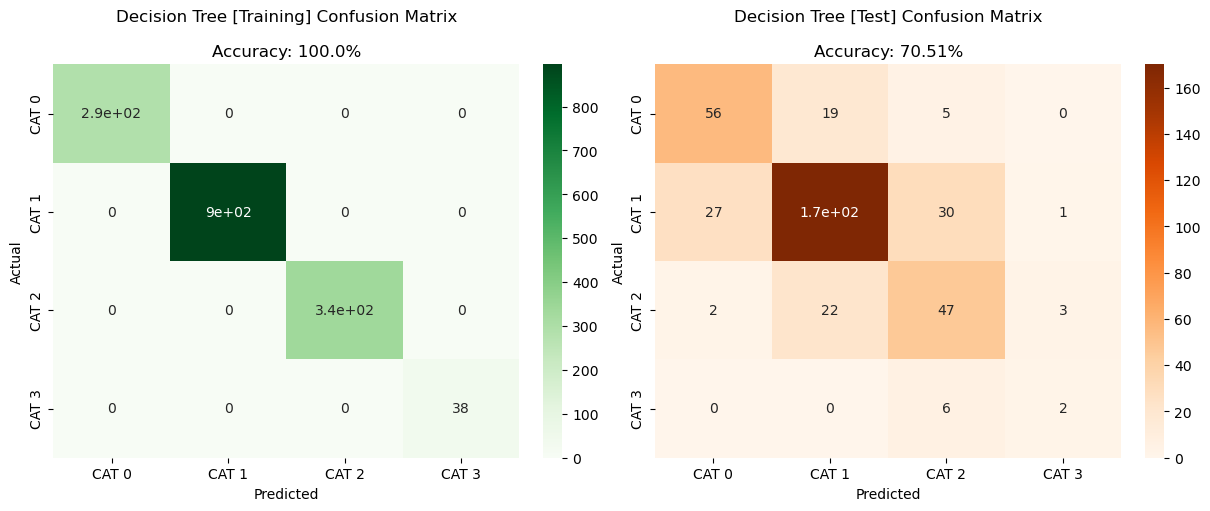

In [12]:
# Decision Tree Model with random state = 42

%matplotlib inline

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(x_train, y_train)
y_trainPredict = clf.predict(x_train)
y_testPredict = clf.predict(x_test)

cm1 = confusion_matrix(y_train, y_trainPredict)
cm2 = confusion_matrix(y_test, y_testPredict)

labels = ['CAT 0','CAT 1','CAT 2','CAT 3']

df_cm1 = pd.DataFrame(cm1, columns = labels, index = labels)
df_cm1.index.name = 'Actual'
df_cm1.columns.name = 'Predicted'

df_cm2 = pd.DataFrame(cm2, columns = labels, index = labels)
df_cm2.index.name = 'Actual'
df_cm2.columns.name = 'Predicted'

fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols = 2,constrained_layout = True, figsize = (12,5))
snFig = sn.heatmap(df_cm1, ax = ax1, cmap = "Greens", annot = True)
snFig = sn.heatmap(df_cm2, ax = ax2, cmap = "Oranges", annot = True)
accuracy_train = accuracy_score(y_train, y_trainPredict)
accuracy_test = accuracy_score(y_test, y_testPredict)
ax1.title.set_text('Decision Tree [Training] Confusion Matrix\n\nAccuracy: '+str(round(accuracy_train*100,2))+'%')
ax2.title.set_text('Decision Tree [Test] Confusion Matrix\n\nAccuracy: '+str(round(accuracy_test*100,2))+'%')

print('Training Accuracy: ', metrics.accuracy_score(y_train,y_trainPredict))
print('Training Error Score: '+str(1.0 - metrics.accuracy_score(y_train,y_trainPredict)))

print('Test Accuracy: ', metrics.accuracy_score(y_test,y_testPredict))
print('Test Error Score: '+str(1.0 - metrics.accuracy_score(y_test,y_testPredict)))

# Random Forest
Fit a Random Forest and Analyse the Confusion Matrix on the Training Set and the Confusion Matrix on the Test Set

Training Accuracy:  1.0
Training Error Score: 0.0
Test Accuracy:  0.8282051282051283
Test Error Score: 0.17179487179487174


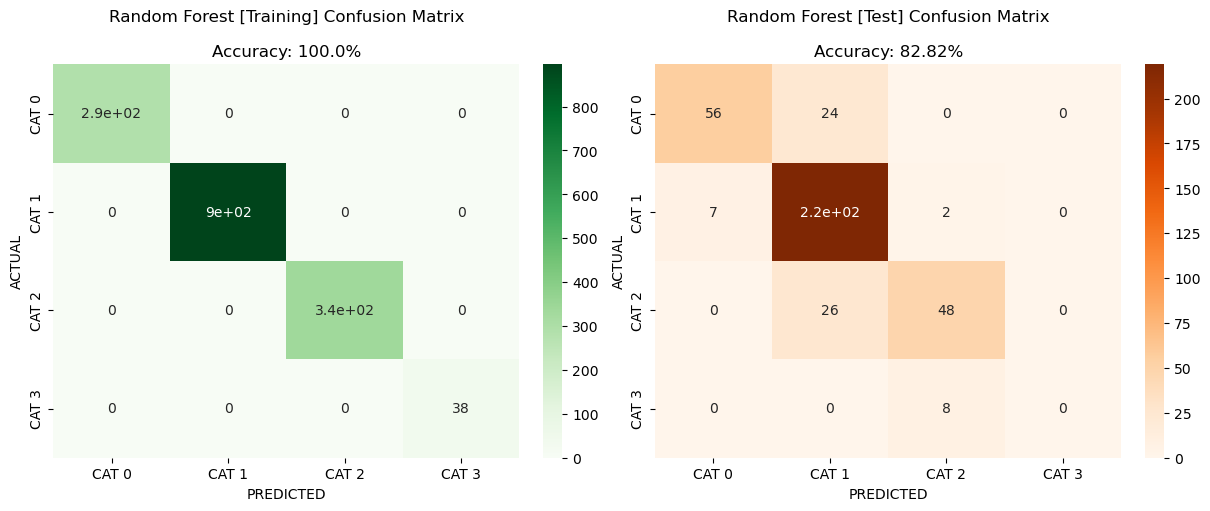

In [13]:
# Step 4- Fit a Random Forest and Analyse the Confusion Matrix on the Training Set and the Confusion Matrix on the Test Set
# Use n_estimators = 100

clf = RandomForestClassifier(random_state = 42, n_estimators = 100)
clf.fit(x_train, np.ravel(y_train))

y_trainPredict = clf.predict(x_train)
y_testPredict = clf.predict(x_test)

cm1 = confusion_matrix(y_train, y_trainPredict)
cm2 = confusion_matrix(y_test, y_testPredict)
    
labels = ['CAT 0','CAT 1','CAT 2','CAT 3']

df_cm1 = pd.DataFrame(cm1, columns = labels, index = labels)
df_cm1.index.name = 'ACTUAL'
df_cm1.columns.name = 'PREDICTED'

df_cm2 = pd.DataFrame(cm2, columns = labels, index = labels)
df_cm2.index.name = 'ACTUAL'
df_cm2.columns.name = 'PREDICTED'

fig, [ax1,ax2] = plt.subplots(nrows = 1, ncols = 2, constrained_layout = True, figsize = (12,5))
snFig = sn.heatmap(df_cm1, ax = ax1, cmap = "Greens", annot = True)
snFig = sn.heatmap(df_cm2, ax = ax2, cmap = "Oranges", annot = True)
accuracy_train = accuracy_score(y_train, y_trainPredict)
accuracy_test = accuracy_score(y_test, y_testPredict)
ax1.title.set_text('Random Forest [Training] Confusion Matrix\n\nAccuracy: '+str(round(accuracy_train*100,2))+'%')
ax2.title.set_text('Random Forest [Test] Confusion Matrix\n\nAccuracy: '+str(round(accuracy_test*100,2))+'%')

print('Training Accuracy: ', metrics.accuracy_score(y_train,y_trainPredict))
print('Training Error Score: '+str(1.0 - metrics.accuracy_score(y_train,y_trainPredict)))

print('Test Accuracy: ', metrics.accuracy_score(y_test,y_testPredict))
print('Test Error Score: '+str(1.0 - metrics.accuracy_score(y_test,y_testPredict)))

# FEATURE IMPORTANCE

In [14]:
# Method 1
# If we are to start collecting Data for less than the current 12 Features then which Features would you recommend and why?
# All features except FEAT_1,5 & 9 as shown in the heatmap that they have low correlation when compared to the category

# Autocorrelation heatmap to detect feature importance
corr = df.corr()
corr.style.background_gradient(cmap = 'YlOrRd')

,FEAT_0,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,CATEGORY
FEAT_0,1.000000,-0.015659,-0.004966,-1.000000,-0.077819,0.028314,0.014798,0.016462,-0.045054,-0.039440,0.022816,0.270576
FEAT_2,-0.015659,1.000000,0.017067,0.015659,0.017525,0.002436,0.008705,-0.035756,0.008152,0.001890,-0.024278,0.308210
FEAT_3,-0.004966,0.017067,1.000000,0.004966,-0.012643,0.012753,-0.036414,-0.015307,0.026345,0.005481,-0.010216,-0.229252
FEAT_4,-1.000000,0.015659,0.004966,1.000000,0.077819,-0.028314,-0.014798,-0.016462,0.045054,0.039440,-0.022816,-0.270576
FEAT_5,-0.077819,0.017525,-0.012643,0.077819,1.000000,-0.018132,0.022888,0.039979,0.031887,-0.002006,0.030238,-0.018296
FEAT_6,0.028314,0.002436,0.012753,-0.028314,-0.018132,1.000000,0.005320,-0.029997,-0.000606,-0.005774,-0.023015,0.456872
FEAT_7,0.014798,0.008705,-0.036414,-0.014798,0.022888,0.005320,1.000000,0.008446,0.017995,-0.043033,-0.001497,0.100850
FEAT_8,0.016462,-0.035756,-0.015307,-0.016462,0.039979,-0.029997,0.008446,1.000000,0.021600,0.029692,-0.009104,0.258282
FEAT_9,-0.045054,0.008152,0.026345,0.045054,0.031887,-0.000606,0.017995,0.021600,1.000000,-0.022642,-0.005442,-0.000852
FEAT_10,-0.039440,0.001890,0.005481,0.039440,-0.002006,-0.005774,-0.043033,0.029692,-0.022642,1.000000,0.015930,0.205058


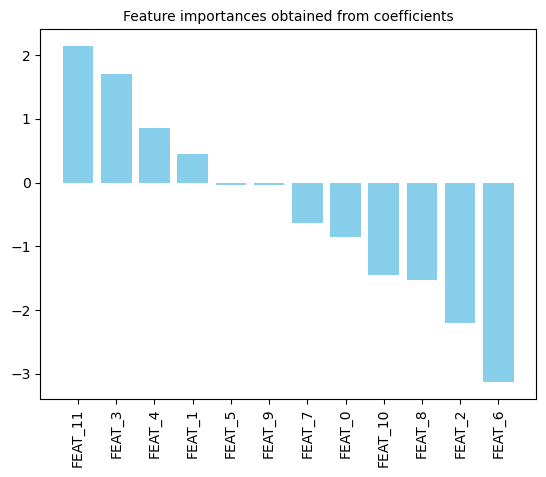

In [15]:
# Method 2: IMPORTANCE FROM COEFFICENTS
# If we are to start collecting Data for less than the current 12 Features then which Features would you recommend and why?
# All features except FEAT_1,5 & 9

Features = ['FEAT_0','FEAT_1','FEAT_2','FEAT_3','FEAT_4','FEAT_5','FEAT_6','FEAT_7','FEAT_8','FEAT_9','FEAT_10','FEAT_11']

x_train = train_set[Features]

scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
# Use Scalers on the x part of the Training Set

lenc_y = LabelEncoder()
y_train = lenc_y.fit_transform(train_set['CATEGORY'])

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by = 'Importance', ascending = False)

plt.bar(x = importances['Attribute'], height = importances['Importance'], color='#87CEEB')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation = 'vertical')
plt.show()

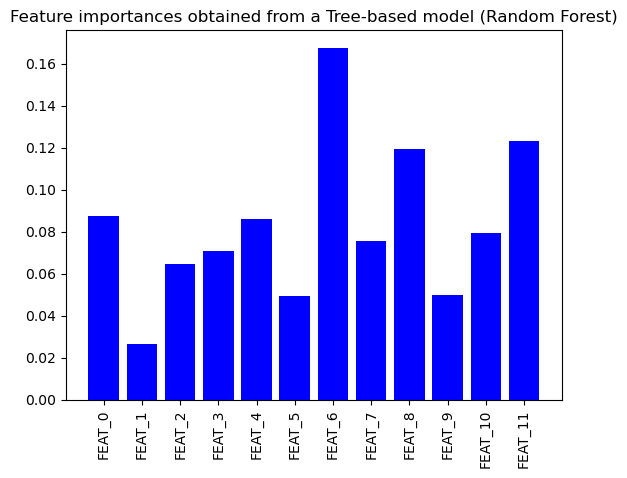

In [16]:
# Method 2: TREE BASED METHOD
# Plot the Feature Importances for Random Forest.
# If we are to start collecting Data for less than the current 12 Features then which Features would you recommend and why?
# All features except FEAT_1,5 & 9

plt.figure()
plt.title("Feature importances obtained from a Tree-based model (Random Forest)")
plt.bar(x_train.columns, clf.feature_importances_, color = "b", align = "center")
plt.xticks(rotation = 90)
plt.show()

# Principal Component Analysis

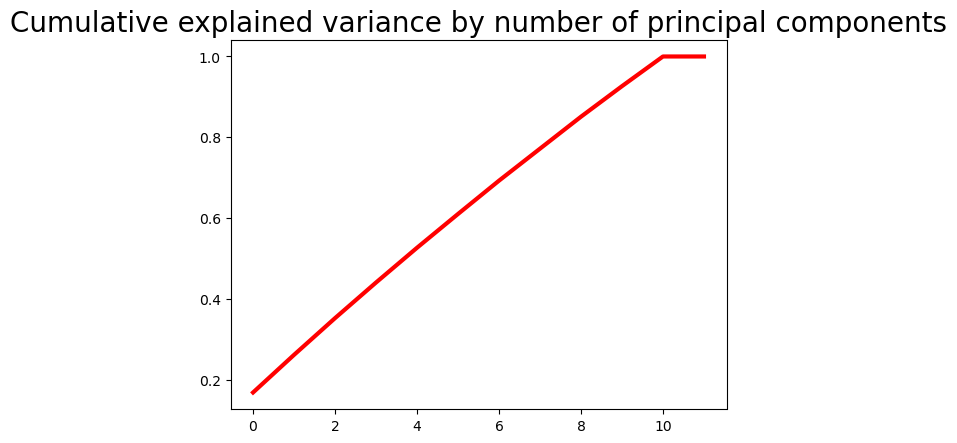

,variance
0,16.874
1,9.309
2,9.083
3,8.812
4,8.600
5,8.354
6,8.244
7,7.917
8,7.908
9,7.553


In [18]:
# Method 3: Importance with PRINCIPAL COMPONENT ANALYSIS 
# If we are to start collecting Data for less than the current 12 Features then which Features would you recommend and why?
# From the variances below, it can be seen that the first 9 components is responsible for 85.5% of the variance in the data which goes with the first 2 methods
# what is the lowest possible number of Features to maintain 75% accuracy?
# from the graph it can be seen that about 8 components is needed to maintain 75% accuracy?

pca = PCA().fit(x_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw = 3, color = 'r')
plt.title('Cumulative explained variance by number of principal components', size = 20)
plt.show()

explained_variance = pca.explained_variance_ratio_
exp_va_df = pd.DataFrame(explained_variance,columns = ["variance"])
exp_va_df = round(exp_va_df*100,3)

exp_va_df